<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week2/2025/Week2_classification_error_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement** <br>
Let's say I have build an ML classifier model which has a test error rate of 4% (consider it as population average error). Now on a particular day I got an  error of 4.5% in production settings. I want to estimate whether it is too far away from population average error rate.

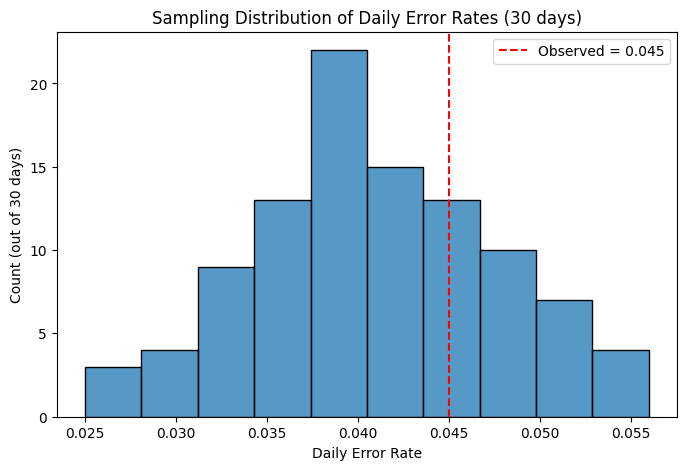

Number of days > 4.500%: 28 out of 100


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set parameters
n = 1000          # number of predictions per day
p = 0.04          # long-term error rate (population average)
days = 100        # we will simulate 30 days
observed_error = 0.045  # your observed daily error in production

# 2. Simulation of daily error rates
np.random.seed(42)  # for reproducibility (optional)
daily_error_rates = []

for _ in range(days):
    errors_today = np.random.binomial(n=n, p=p) # since error is a binary variable - we can take a binomial distribution to simulate daily error
    daily_error_rate = errors_today / n
    daily_error_rates.append(daily_error_rate)

# 3. Plot the sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(daily_error_rates, bins=10, kde=False)
plt.axvline(observed_error, color='red', linestyle='--',
            label=f'Observed = {observed_error:.3f}') # draws a vertical line
plt.xlabel("Daily Error Rate")
plt.ylabel("Count (out of 30 days)")
plt.title("Sampling Distribution of Daily Error Rates (30 days)")
plt.legend()
plt.show()

# 4. Compute how many simulated days exceed observed_error
days_above_obs = sum(rate > observed_error for rate in daily_error_rates)
print(f"Number of days > {observed_error:.3%}: {days_above_obs} out of {days}")


#### A/B Test problem:
Evaluating the Impact of a New Website Banner on Purchase Conversions in an E-Commerce Store

Background:
An e-commerce company is looking to improve its online sales by enhancing user engagement. The marketing team believes that introducing a new promotional banner on the homepage could encourage more users to make purchases. To test this hypothesis, they designed an A/B test where:

    Group A (Control Group): Sees the existing homepage without the promotional banner.
    Group B (Treatment Group): Sees the new homepage with the promotional banner.

Objective:
Test whether the difference in conversion rates between the two groups is statistically significant.

Results:

    Conversion Rate (Group A): 10.0%
    Conversion Rate (Group B): 11.2%